In [82]:
## PLot images for ale ma of data organized by experiment

In [83]:
%matplotlib inline
from nilearn import plotting
from nilearn import surface
from nilearn.plotting import plot_stat_map
import matplotlib.pyplot as plt
from tqdm import tqdm

import os
from os import listdir
from os.path import isfile, join
import nibabel as nib
from pathlib import Path
##Conjunctions
import copy
from nilearn.image import math_img
import numpy as np

In [134]:
_nii_folder = r'../data_db/nifti-ale/by_exp/'
_nii_combos_folder = r'../data_db/nifti-ale/combos/by_exp/'
_img_folder_brain_glass = r'../data_db/nifti-ale/imgs/by_exp/brain_glass/'
_img_folder_stat_map = r'../data_db/nifti-ale/imgs/by_exp/stat_map/'
_img_folder_stat_map_manual = r'../data_db/nifti-ale/imgs/by_exp/stat_map/manual/'
_threshold = 1.64 #1.644854 # cluster-level p < .05, one-tailed
_threshold_combos = 0

## Import nifti images

In [123]:
nifti_files = {Path(f).stem: os.path.join(os.path.abspath(_nii_folder), f) for f in listdir(_nii_folder) if isfile(join(_nii_folder, f))}
nifti_combos_files = {Path(f).stem: os.path.join(os.path.abspath(_nii_combos_folder), f) for f in listdir(_nii_combos_folder) if isfile(join(_nii_combos_folder, f))}


## Load images

In [100]:
nifti_images = {k:nib.load(f) for k,f in nifti_files.items()}
nifti_images_combos = {k:nib.load(f) for k,f in nifti_combos_files.items()}

In [88]:
dict_keys = list(nifti_images.keys())
dict_keys

['select00_test',
 'select01_wm',
 'select02_wm_decision-making',
 'select03_reward_anticipation_rw-norw',
 'select04_reward_anticipation_high_low_rew',
 'select05_reward_anticipation_exp_recv_rew',
 'select06_reward_outcome_rw-norw',
 'select07_reward_outcome_risk-safe',
 'select08_reward_outcome_high-low',
 'select09_reward_outcome_win-lose',
 'select10_reward_decision-making_outcome',
 'select11_reward_decision-making_anticipation',
 'select12_reward_decision-making_decision']

### Recreate combos

In [90]:
%%time
formula = "np.where(img1 * img2 > 0, np.minimum(img1, img2), 0)"
img_conj = math_img(formula,
                    img1=copy.deepcopy(nifti_images[dict_keys[1]]),
                    img2=copy.deepcopy(nifti_images[dict_keys[12]]))
num_vox = np.sum(img_conj.get_fdata() > 0)
print(np.max(img_conj.get_fdata()))
num_vox

1.7506860712521692
CPU times: total: 1.77 s
Wall time: 1.78 s


61

#### Save img to nifti - for combos

In [91]:
img_to_save = img_conj
img_name = 'img_combo1_6'
nib.save(img_to_save, os.path.join(os.path.abspath(_nii_combos_folder), img_name + '.nii'))
print(np.sum(img_to_save.get_fdata() > 0))
print(np.max(img_to_save.get_fdata()))


61
1.7506860712521692


# Plot for report
## Glass Brain for all points

C:\ProgramData\Anaconda3\envs\tfg-env\lib\site-packages\nilearn\plotting\displays\_slicers.py:383: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


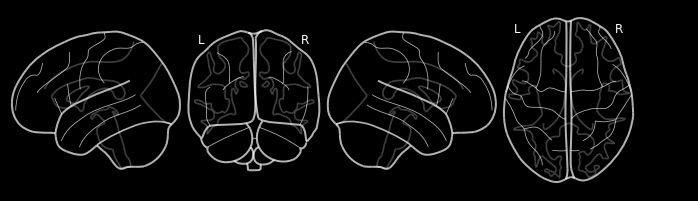

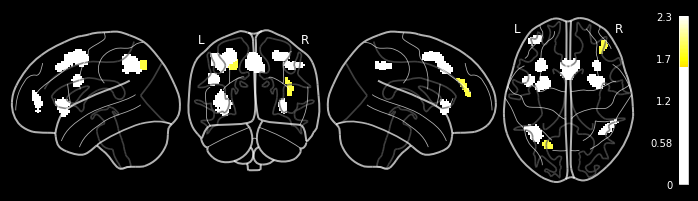

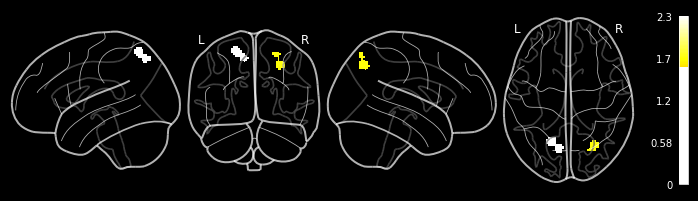

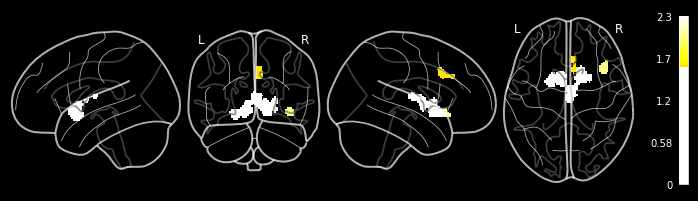

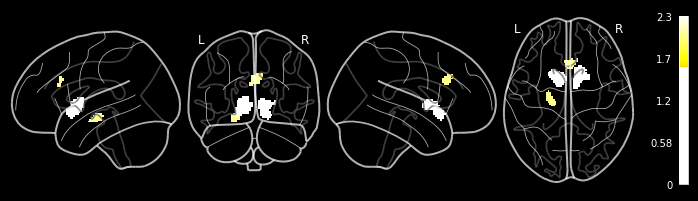

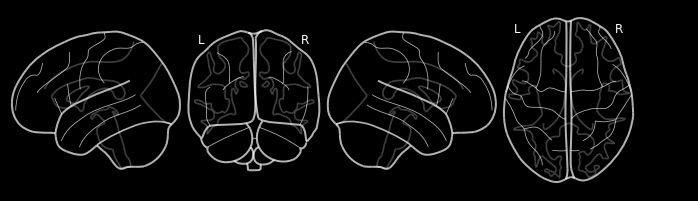

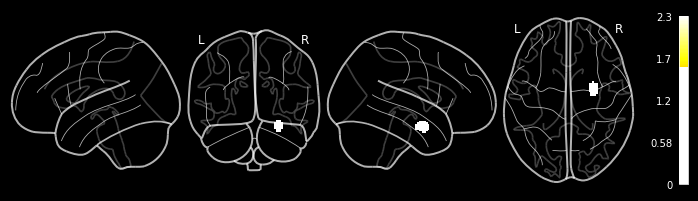

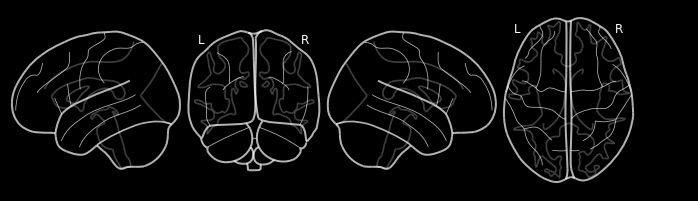

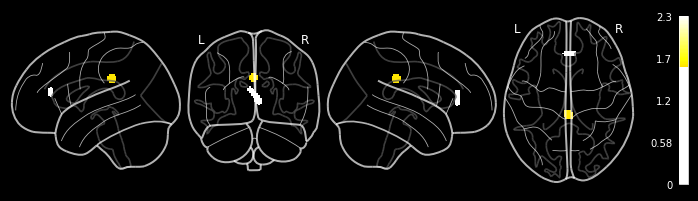

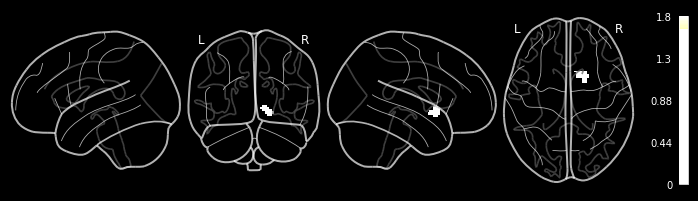

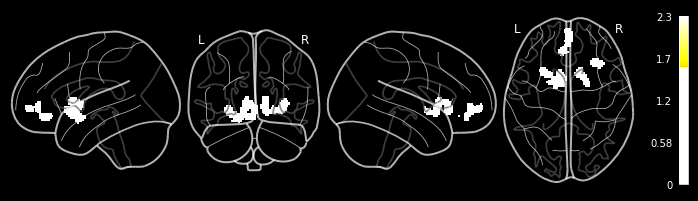

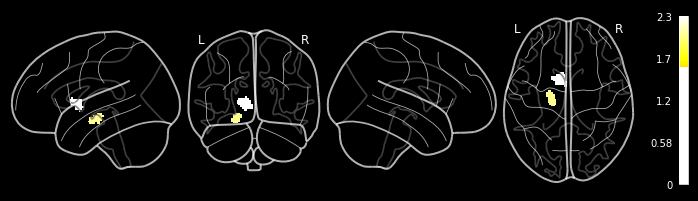

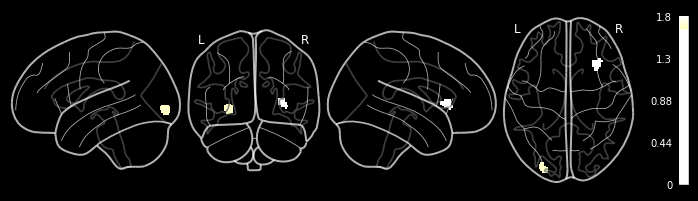

In [135]:
glass_images ={}
for key,val in nifti_images.items():
    glass_images[key] = plotting.plot_glass_brain(
        val, title='',colorbar=True,
        black_bg=True, display_mode='lyrz', threshold=_threshold) #display_mode='ortho' #if there are not voxels in both hemispheres

### Save glass brain images

In [136]:
for key,img in glass_images.items():
    img.savefig(os.path.join(os.path.abspath(_img_folder_brain_glass), key+".png"),dpi=300)

In [38]:
glass_images

{'select00_test': <nilearn.plotting.displays._projectors.LYRZProjector at 0x2300d14c1f0>,
 'select01_wm': <nilearn.plotting.displays._projectors.LYRZProjector at 0x22fe0384be0>,
 'select02_wm_decision-making': <nilearn.plotting.displays._projectors.LYRZProjector at 0x22fe5095fd0>,
 'select03_reward_anticipation_rw-norw': <nilearn.plotting.displays._projectors.LYRZProjector at 0x22fe81cd400>,
 'select04_reward_anticipation_high_low_rew': <nilearn.plotting.displays._projectors.LYRZProjector at 0x22feac207f0>,
 'select05_reward_anticipation_exp_recv_rew': <nilearn.plotting.displays._projectors.LYRZProjector at 0x22feddcdbe0>,
 'select06_reward_outcome_rw-norw': <nilearn.plotting.displays._projectors.LYRZProjector at 0x23001c0fe80>,
 'select07_reward_outcome_risk-safe': <nilearn.plotting.displays._projectors.LYRZProjector at 0x2300d18af10>,
 'select08_reward_outcome_high-low': <nilearn.plotting.displays._projectors.LYRZProjector at 0x23016a731f0>,
 'select09_reward_outcome_win-lose': <nile

In [39]:
### Save manually
glass_images['select01_wm'].savefig("test.png",dpi=300)

## Glass Brain for combos

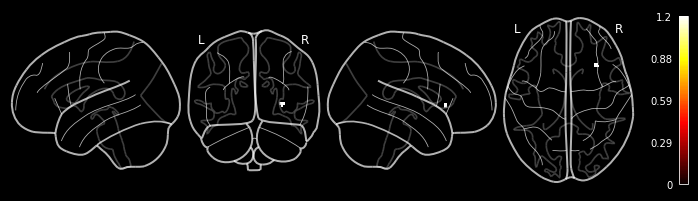

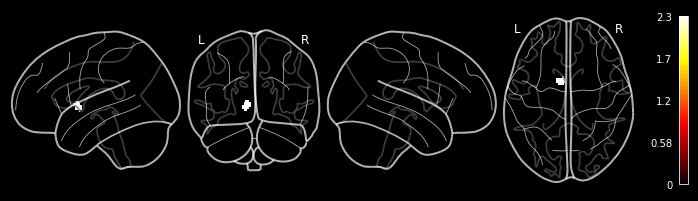

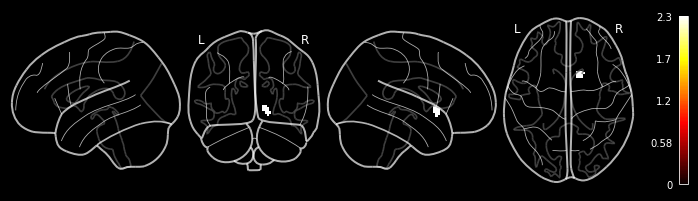

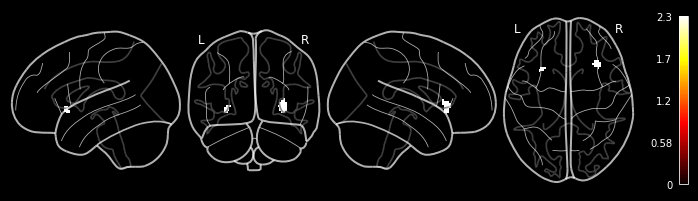

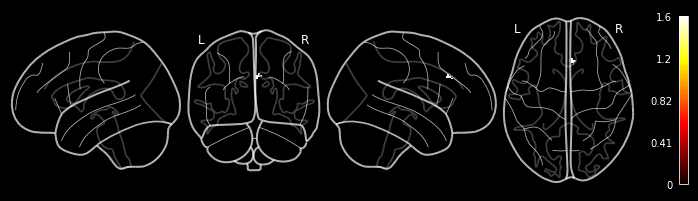

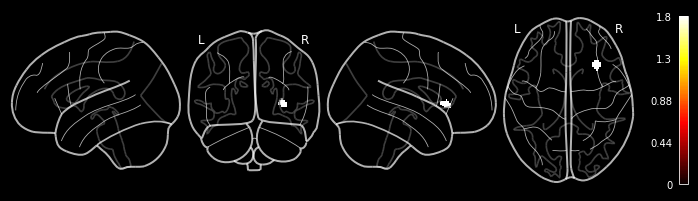

In [109]:
glass_images_combos ={}
for key,val in nifti_images_combos.items():
    glass_images_combos[key] = plotting.plot_glass_brain(
        val, title='',colorbar=True,
        black_bg=True, display_mode='lyrz', threshold=_threshold_combos) #display_mode='ortho' #if there are not voxels in both hemispheres

### Save glass brain images

In [110]:
for key,img in glass_images_combos.items():
    img.savefig(os.path.join(os.path.abspath(_img_folder_brain_glass), key+".png"),dpi=300)

In [111]:
glass_images_combos

{'img_combo1_1': <nilearn.plotting.displays._projectors.LYRZProjector at 0x23017e23700>,
 'img_combo1_2': <nilearn.plotting.displays._projectors.LYRZProjector at 0x23039198760>,
 'img_combo1_3': <nilearn.plotting.displays._projectors.LYRZProjector at 0x2303b45a7c0>,
 'img_combo1_4': <nilearn.plotting.displays._projectors.LYRZProjector at 0x2303f6ba820>,
 'img_combo1_5': <nilearn.plotting.displays._projectors.LYRZProjector at 0x23040849be0>,
 'img_combo1_6': <nilearn.plotting.displays._projectors.LYRZProjector at 0x230419dac40>}

In [43]:
### Save manually
glass_images_combos['img_combo1_3'].savefig("test.png",dpi=300)

## Sections

### Automatic - all points

0it [00:00, ?it/s]

select00_test


1it [00:07,  7.87s/it]

select01_wm


2it [00:15,  7.89s/it]

select02_wm_decision-making


3it [00:23,  7.92s/it]

select03_reward_anticipation_rw-norw


4it [00:31,  7.91s/it]

select04_reward_anticipation_high_low_rew


5it [00:39,  7.98s/it]

select05_reward_anticipation_exp_recv_rew


6it [00:47,  7.98s/it]

select06_reward_outcome_rw-norw


7it [00:55,  8.03s/it]

select07_reward_outcome_risk-safe


8it [01:03,  8.04s/it]

select08_reward_outcome_high-low


9it [01:12,  8.08s/it]

select09_reward_outcome_win-lose


10it [01:20,  8.12s/it]

select10_reward_decision-making_outcome


11it [01:28,  8.25s/it]

select11_reward_decision-making_anticipation


12it [01:37,  8.29s/it]

select12_reward_decision-making_decision


13it [01:45,  8.15s/it]


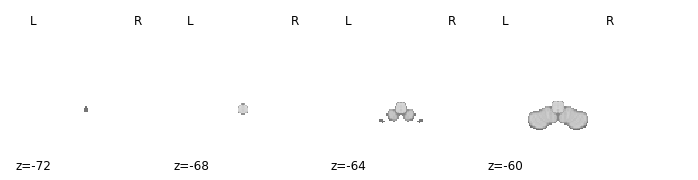

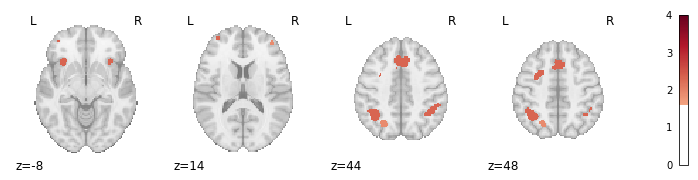

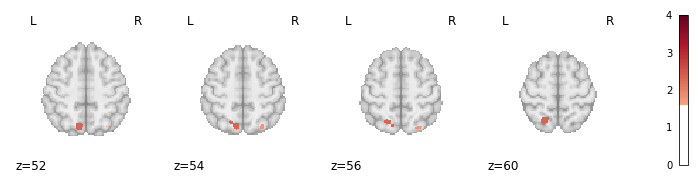

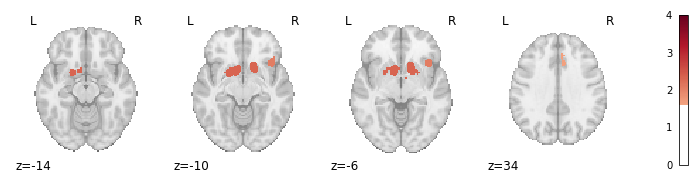

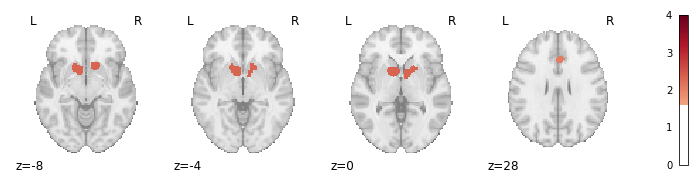

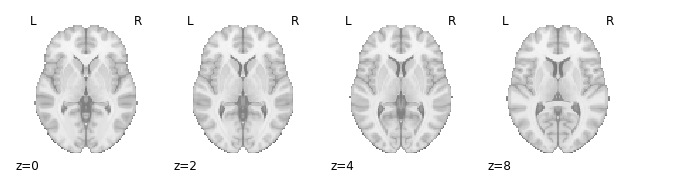

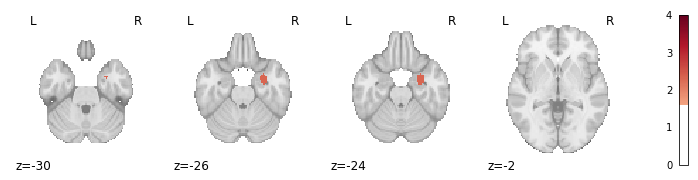

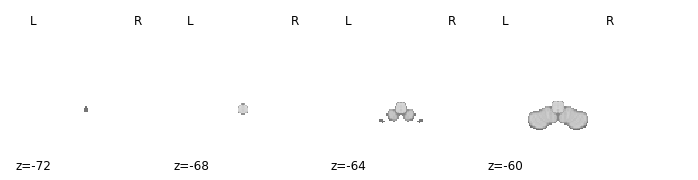

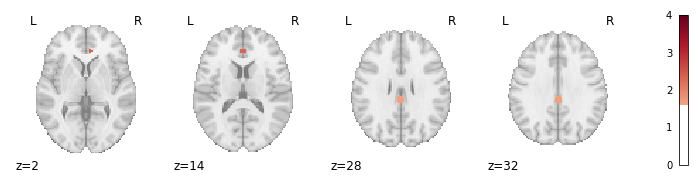

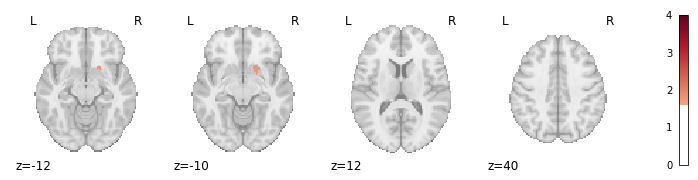

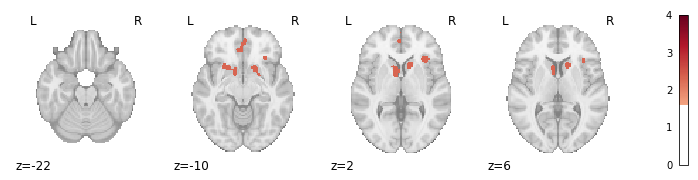

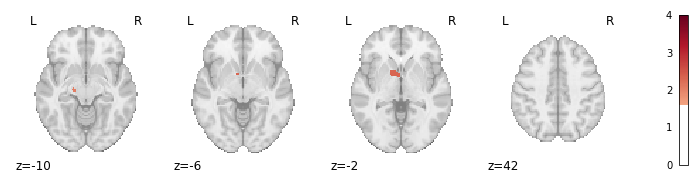

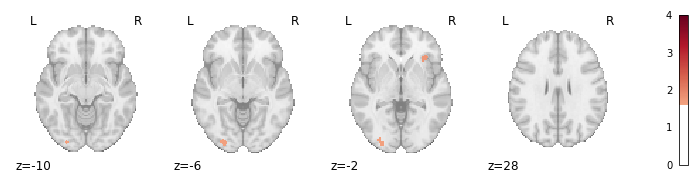

In [44]:
stat_map={}
res_len = len(nifti_images)
# fig, axes = plt.subplots(figsize=(12, res_len * 10), nrows=res_len)
for index, (k, image) in tqdm(enumerate(nifti_images.items())):
    print(k)
    stat_map[k] = plot_stat_map(
        image,
        cut_coords=4,
        display_mode="z",
        # title="",#"Semantic select " + str(index),
        threshold=_threshold,  #'auto'
        cmap="RdBu_r",
        vmax=4,
        # axes=axes[index],
        # figure=fig,
    )

#### Save Section image - all points

In [45]:
for key,img in stat_map.items():
    img.savefig(os.path.join(os.path.abspath(_img_folder_stat_map), key+".png"),dpi=300)

### Sections - Automatic in COG

In [46]:
lst = [(29, -66, 44),(-10, -69, 52),(-19, -61, 60)]
## Import the cog from csv

## do sections for all images in cog

### Automatic - combos

0it [00:00, ?it/s]

img_combo1_1


1it [00:08,  8.56s/it]

img_combo1_2


2it [00:17,  8.54s/it]

img_combo1_3


3it [00:25,  8.47s/it]

img_combo1_4


4it [00:33,  8.41s/it]

img_combo1_5


5it [00:42,  8.44s/it]


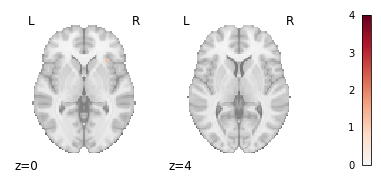

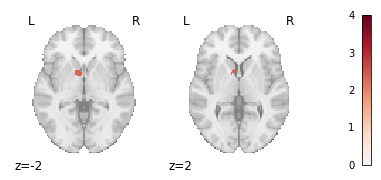

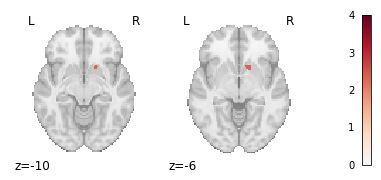

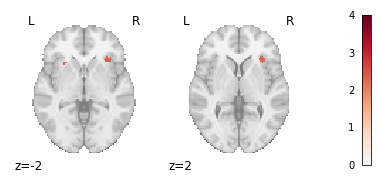

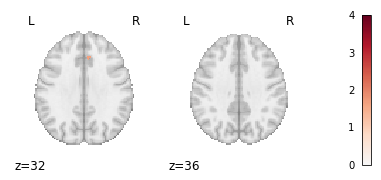

In [47]:
stat_map_combos={}
res_len = len(nifti_images_combos)
for index, (k, image) in tqdm(enumerate(nifti_images_combos.items())):
    print(k)
    stat_map_combos[k] = plot_stat_map(
        image,
        cut_coords=2,
        display_mode="z",
        # title="",#"Semantic select " + str(index),
        threshold=_threshold_combos,  #'auto'
        cmap="RdBu_r",
        vmax=4,
    )

#### Save Section image - combos

In [48]:
for key,img in stat_map_combos.items():
    img.savefig(os.path.join(os.path.abspath(_img_folder_stat_map), key+".png"),dpi=300)

### Manual - selection

In [114]:
list(nifti_images.keys())

['select00_test',
 'select01_wm',
 'select02_wm_decision-making',
 'select03_reward_anticipation_rw-norw',
 'select04_reward_anticipation_high_low_rew',
 'select05_reward_anticipation_exp_recv_rew',
 'select06_reward_outcome_rw-norw',
 'select07_reward_outcome_risk-safe',
 'select08_reward_outcome_high-low',
 'select09_reward_outcome_win-lose',
 'select10_reward_decision-making_outcome',
 'select11_reward_decision-making_anticipation',
 'select12_reward_decision-making_decision']

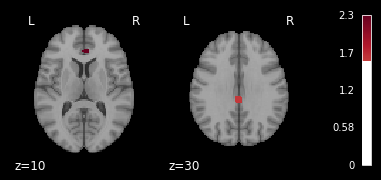

In [139]:
file_name = 'select08_reward_outcome_high-low'
image = nifti_images[file_name]
# lst = [(28, -68, 47),(-15, -65, 56)]
stat_map_img = plot_stat_map(
    image,
    cut_coords=[10,30],
    display_mode="z",
    draw_cross=False,
    # title=" ",
    threshold=_threshold,  #'auto'
    cmap="RdBu_r",
    # vmax=4,
    black_bg=True,
)

In [140]:
stat_map_img.savefig(os.path.join(os.path.abspath(_img_folder_stat_map_manual),file_name+'.png'),dpi=300)
# stat_map_img.savefig(os.path.join(os.path.abspath(_img_folder_stat_map_manual),'test'+'.png'),dpi=300)

### Manual - combos

In [102]:
list(nifti_images_combos.keys())

['img_combo1_1',
 'img_combo1_2',
 'img_combo1_3',
 'img_combo1_4',
 'img_combo1_5',
 'img_combo1_6']

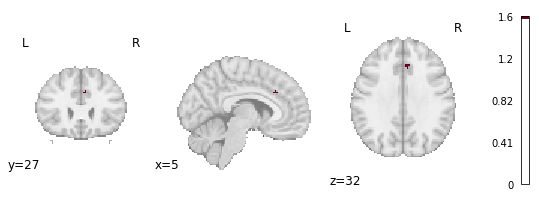

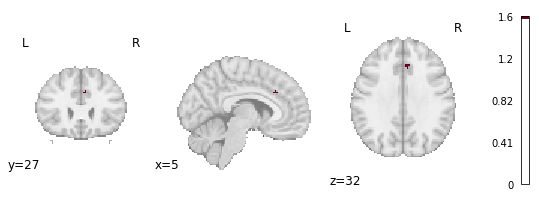

In [119]:
file_name_combos = 'img_combo1_5'
image = nifti_images_combos[file_name_combos]
# lst = [(28, -68, 47),(-15, -65, 56)]
stat_map_img = plot_stat_map(
    image,
    cut_coords=[5,27,32],
    display_mode="ortho",
    draw_cross=False,
    # title=" ",
    threshold=_threshold,  #'auto'
    cmap="RdBu_r",
    # vmax=4,
    black_bg=True,
)

In [113]:
stat_map_img.savefig(os.path.join(os.path.abspath(_img_folder_stat_map_manual),file_name_combos+'.png'),dpi=300)